In [9]:
#SE IMPORTAN LIBRERIAS
import matplotlib.pyplot as plt;
import pandas  as pd;
import numpy   as np;
import seaborn as sns;
from copy import deepcopy;
from   mpl_toolkits.mplot3d import Axes3D;
#SE CONFIGURA EL TAMAÑO DEL GRAFICO DE CORRELACIÓN
sns.set(rc={'figure.figsize':(16,9)});
plt.rcParams['figure.figsize'] = (16, 9);
plt.style.use('ggplot');

In [2]:
#SE CARGA EL DATASET CALIDAD DEL VINO BLANCO
data = pd.read_csv('HTRU_2.csv', delimiter=',', decimal='.', header=None, names=['meanPr','desviationPr','kurtosisPr','SkewnessPr','meanCu','desviationCu','kurtosisPrCu','SkewnessCu', 'Class']);    
datos = pd.DataFrame(data);


In [3]:
#SE CALCULA LA DISTANCIA EUCLIDEAN
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax);

In [4]:
#DATOS X
X = np.array( datos.iloc[:, [2,3,5] ] ) ;
#DATOS OBJETIVO ALCOHOL
Y = np.array( datos.iloc[:,8] );


17898


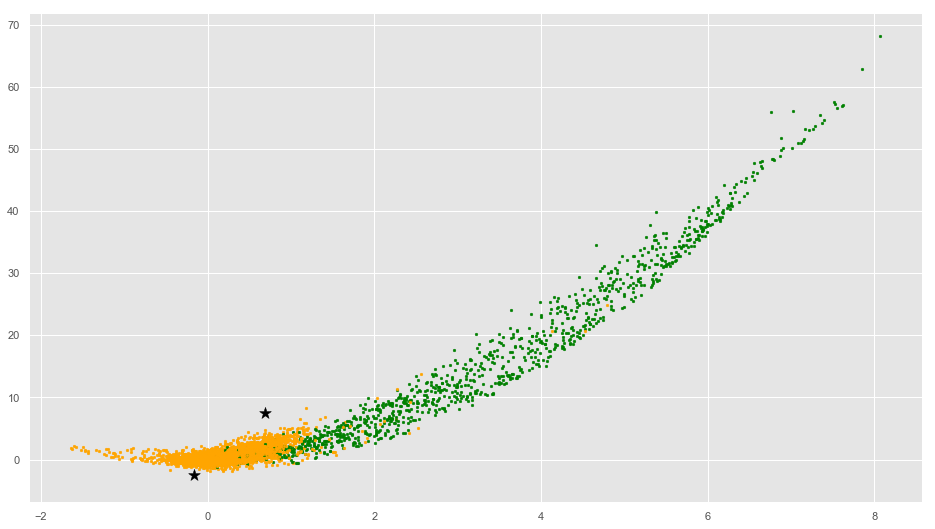

In [19]:
# Number of clusters
k = 2
# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

print(X.shape[0])

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(X, axis = 0)
std =  np.std(X, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'green']
for i in range(int(n/2)):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(Y[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='black', s=150)

In [15]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

X.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(X - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new  

array([[ 1.61022746,  7.93003641, 68.53838442],
       [ 0.28790986,  0.73702159, 19.24576067]])

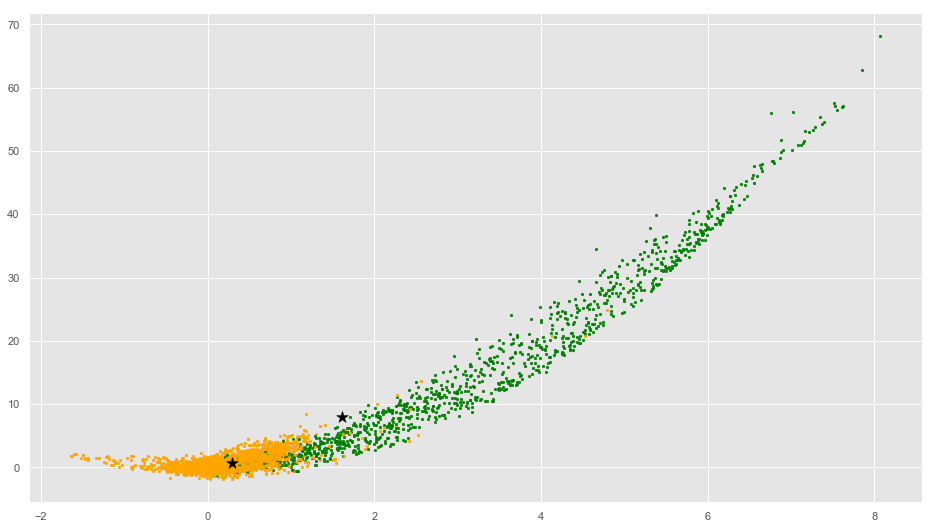

In [16]:
# Plot the data and the centers generated as random
colors=['orange', 'green']
for i in range(int(n/2)):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(Y[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='black', s=150)